<a href="https://colab.research.google.com/github/ansul1214/Datascience_project/blob/main/Assignment2_23113029.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.formula.api as smf
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score




Importing tips dataset

In [3]:
df=pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [7]:
df.duplicated().sum()

1

In [11]:
df.drop_duplicates(inplace=True)

In [10]:
df.dtypes

,0
total_bill,float64
tip,float64
sex,object
smoker,object
day,object
time,object
size,int64


We can see their are no missing values and the duplicates are dropped

Lets us encode for columns like day,time and sex to be able to perform anlaysis

In [17]:
df['sex'] = df['sex'].map({'Female': 0, 'Male': 1})

In [20]:
df['time'] = df['time'].map({'Lunch': 0, 'Dinner': 1})

In [21]:
day_order = {'Sun': 0, 'Mon': 1, 'Tue': 2, 'Wed': 3,'Thur':4,'Fri':5,'Sat':6}
df['day'] = df['day'].map(day_order)


In [22]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,No,0,1,2
1,10.34,1.66,1,No,0,1,3
2,21.01,3.50,1,No,0,1,3
3,23.68,3.31,1,No,0,1,2
4,24.59,3.61,0,No,0,1,4


In [137]:
# Target variable
target = df['tip'].values
# Feature variables
features = df.drop(columns=['tip','smoker']).values


LINEAR REGRESSION



In [138]:
#training size=80 test size=20
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [139]:
linear_reg = LinearRegression()
linear_reg.fit(features_train, target_train)

# Predictions
target_pred_linear = linear_reg.predict(features_test)

# Evaluation
print('Linear Regression R2:', r2_score(target_test, target_pred_linear))
print('Linear Regression MAE:', mean_absolute_error(target_test, target_pred_linear))
print('Linear Regression MSE:', mean_squared_error(target_test, target_pred_linear))
# Perform 5-fold cross-validation
scores = cross_val_score(linear_reg, features, target, cv=5, scoring='r2')
# Print the average R-squared score and standard deviation
print("Linear Regression - Cross-Validation R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Linear Regression R2: 0.521965185612018
Linear Regression MAE: 0.7618664294771519
Linear Regression MSE: 1.1647198992732355
Linear Regression - Cross-Validation R2: 0.44 (+/- 0.26)


Ridge REGRESSION

In [140]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(features_train, target_train)

# Predictions
target_pred_ridge = ridge_reg.predict(features_test)
ridge_scores = cross_val_score(ridge_reg, features, target, cv=5, scoring='r2')


# Evaluation
print('Ridge Regression R2:', r2_score(target_test, target_pred_ridge))
print('Ridge Regression MAE:', mean_absolute_error(target_test, target_pred_ridge))
print('Ridge Regression MSE:', mean_squared_error(target_test, target_pred_ridge))
print("Ridge Regression - Cross-Validation R2: %0.2f (+/- %0.2f)" % (ridge_scores.mean(), ridge_scores.std() * 2))

Ridge Regression R2: 0.5221835902175773
Ridge Regression MAE: 0.7616772747888455
Ridge Regression MSE: 1.164187761900535
Ridge Regression - Cross-Validation R2: 0.44 (+/- 0.26)


Lasso Regression

In [141]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(features_train, target_train)

# Predictions
target_pred_lasso = lasso_reg.predict(features_test)
# Evaluation
print('Lasso Regression R2:', r2_score(target_test, target_pred_lasso))
print('Lasso Regression MAE:', mean_absolute_error(target_test, target_pred_lasso))
print('Lasso Regression MSE:', mean_squared_error(target_test, target_pred_lasso))
lasso_scores = cross_val_score(lasso_reg, features, target, cv=5, scoring='r2')
print(f"Lasso Regression - Cross-Validation R2: {lasso_scores.mean():.2f} (+/- {lasso_scores.std() * 2:.2f})")


Lasso Regression R2: 0.5245500493821638
Lasso Regression MAE: 0.7591553763341362
Lasso Regression MSE: 1.1584219431842973
Lasso Regression - Cross-Validation R2: 0.45 (+/- 0.27)


Decision Tree

In [142]:
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(features_train, target_train)

# Predictions
target_pred_tree = tree_reg.predict(features_test)

# Evaluation
print('Decision Tree R2:', r2_score(target_test, target_pred_tree))
print('Decision Tree MAE:', mean_absolute_error(target_test, target_pred_tree))
print('Decision Tree MSE:', mean_squared_error(target_test, target_pred_tree))
tree_scores = cross_val_score(tree_reg, features, target, cv=5, scoring='r2')
print(f"Decision Tree - Cross-Validation R2: {tree_scores.mean():.2f} (+/- {tree_scores.std() * 2:.2f})")


Decision Tree R2: 0.20745659051012288
Decision Tree MAE: 1.0391836734693876
Decision Tree MSE: 1.9310122448979592
Decision Tree - Cross-Validation R2: 0.03 (+/- 0.43)


Ensemble Method

In [124]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=0)
forest_reg.fit(features_train, target_train)

# Predictions
target_pred_forest = forest_reg.predict(features_test)

# Evaluation
print('Random Forest R2:', r2_score(target_test, target_pred_forest))
print('Random Forest MAE:', mean_absolute_error(target_test, target_pred_forest))
print('Random Forest MSE:', mean_squared_error(target_test, target_pred_forest))
forest_scores = cross_val_score(forest_reg, features, target, cv=5, scoring='r2')
print(f"Random Forest - Cross-Validation R2: {forest_scores.mean():.2f} (+/- {forest_scores.std() * 2:.2f})")


Random Forest R2: 0.4938576028592814
Random Forest MAE: 0.8397884353741499
Random Forest MSE: 1.2332033234240365
Random Forest - Cross-Validation R2: 0.26 (+/- 0.26)


Support Vector Regression

In [126]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling for SVR
sc_X = StandardScaler()
sc_y = StandardScaler()
features_train_scaled = sc_X.fit_transform(features_train)
features_test_scaled = sc_X.transform(features_test)
target_train_scaled = sc_y.fit_transform(target_train.reshape(-1, 1)).ravel()

svr_reg = SVR(kernel='rbf')
svr_reg.fit(features_train_scaled, target_train_scaled)

# Predictions
target_pred_svr = svr_reg.predict(features_test_scaled)
target_pred_svr = sc_y.inverse_transform(target_pred_svr.reshape(-1, 1)).ravel()  # Inverse transform to get original scale

# Evaluation
print('SVR R2:', r2_score(target_test, target_pred_svr))
print('SVR MAE:', mean_absolute_error(target_test, target_pred_svr))
print('SVR MSE:', mean_squared_error(target_test, target_pred_svr))
svr_scores = cross_val_score(svr_reg, features_train_scaled, target_train_scaled, cv=5, scoring='r2')
print(f"SVR - Cross-Validation R2: {svr_scores.mean():.2f} (+/- {svr_scores.std() * 2:.2f})")


SVR R2: 0.42202231711953664
SVR MAE: 0.7510553075082635
SVR MSE: 1.408228204986644
SVR - Cross-Validation R2: 0.17 (+/- 0.47)


KNN REGRESSION

In [127]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(features_train, target_train)

# Predictions
target_pred_knn = knn_reg.predict(features_test)

# Evaluation
print('KNN Regression R2:', r2_score(target_test, target_pred_knn))
print('KNN Regression MAE:', mean_absolute_error(target_test, target_pred_knn))
print('KNN Regression MSE:', mean_squared_error(target_test, target_pred_knn))
knn_scores = cross_val_score(knn_reg, features, target, cv=5, scoring='r2')
print(f"KNN - Cross-Validation R2: {knn_scores.mean():.2f} (+/- {knn_scores.std() * 2:.2f})")

KNN Regression R2: 0.3696530355352192
KNN Regression MAE: 0.8470204081632653
KNN Regression MSE: 1.5358246530612245
KNN - Cross-Validation R2: 0.25 (+/- 0.19)


2.Analysis using graphs

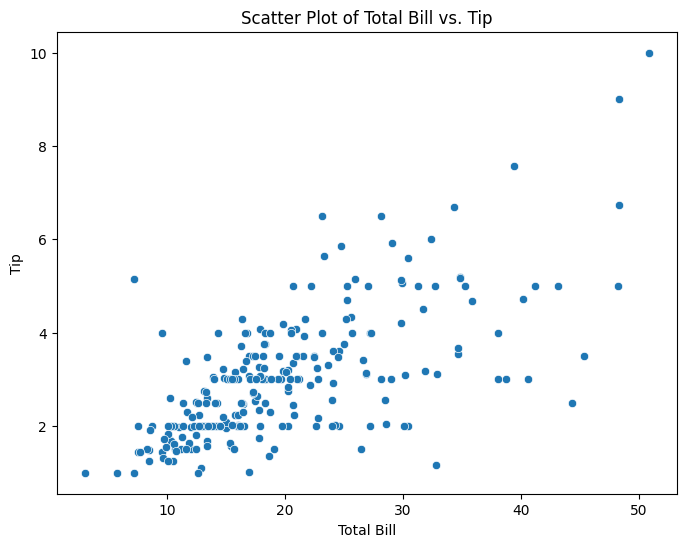

In [53]:
# 1. Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Scatter Plot of Total Bill vs. Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()



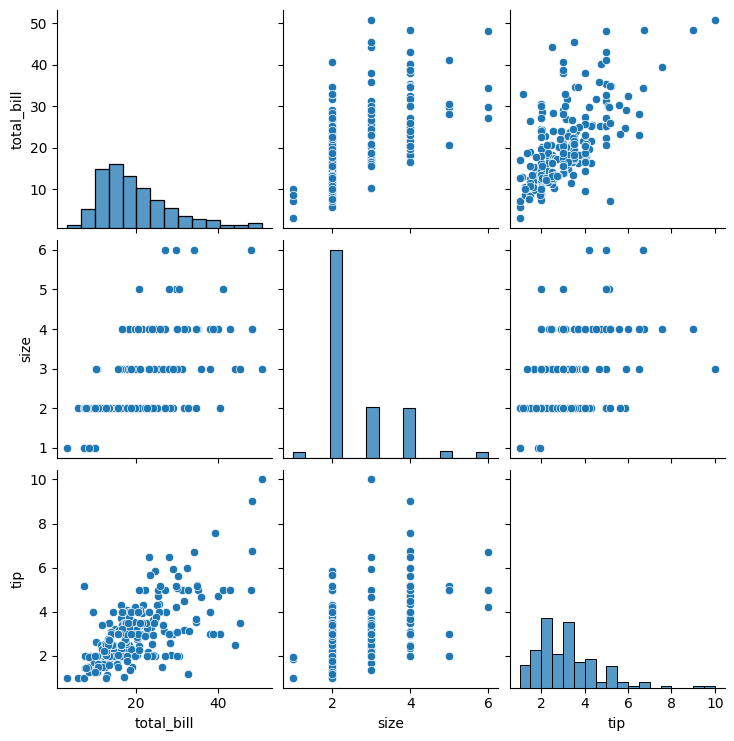

In [56]:
#2. Pair Plot for Multiple Features
sns.pairplot(df[['total_bill', 'size', 'tip']])
plt.show()

From here it can be seen that the mean of customers who came in larger group size as in 4 is larger than others and people who came in pair of 2 majority has tiped so these should be taken into considerations

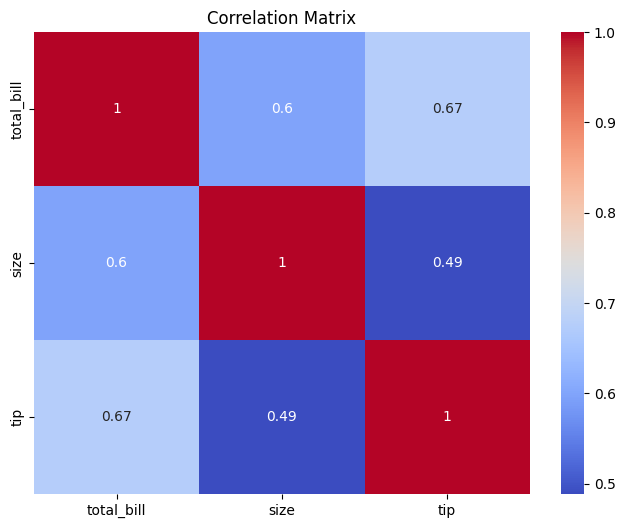

In [57]:
correlation_matrix = df[['total_bill', 'size', 'tip']].corr()  # Adjust columns as needed
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

It can seen that there is significant amount of correlation between tip and size and also between tip and total bill

In [91]:
formula = 'tip ~ total_bill + size'
model = smf.ols(formula, data=df).fit()
rainbow_statistic, rainbow_p_value = linear_rainbow(model, frac=0.5)
print('Rainbow Test Statistic:', rainbow_statistic)
print('Rainbow Test p-value:', rainbow_p_value)

Rainbow Test Statistic: 1.2653810872757194
Rainbow Test p-value: 0.0997456046936553


Here P value is grater than 0.05 so null hypothesis is accepted and it has linear pattern which was evident from scatter plot but this gives a practically more seeming proof

Residual Plot for Linear regression

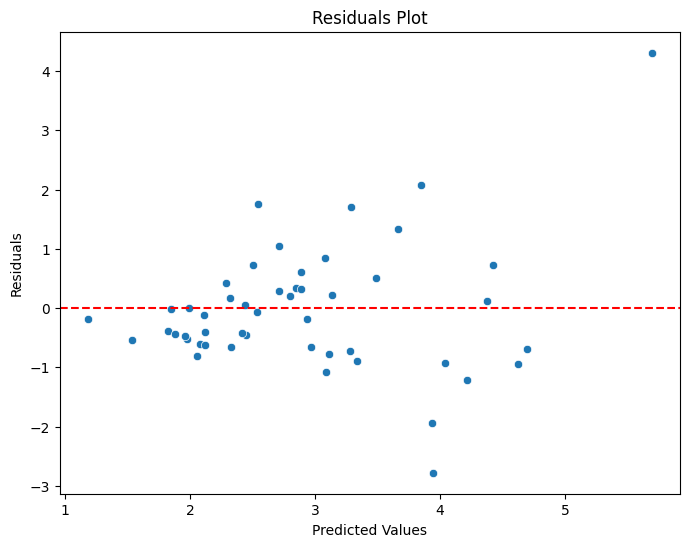

In [143]:
lin_residuals = target_test - target_pred_linear
plt.figure(figsize=(8, 6))
sns.scatterplot(x=target_pred_linear, y=lin_residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Residual plot for lasso

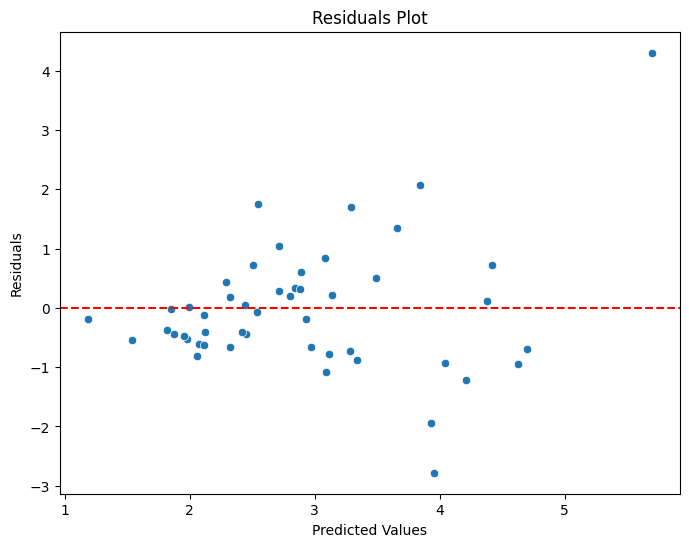

In [144]:
ridge_residuals = target_test - target_pred_ridge
plt.figure(figsize=(8, 6))
sns.scatterplot(x=target_pred_ridge, y=ridge_residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Residual Plot for lasso

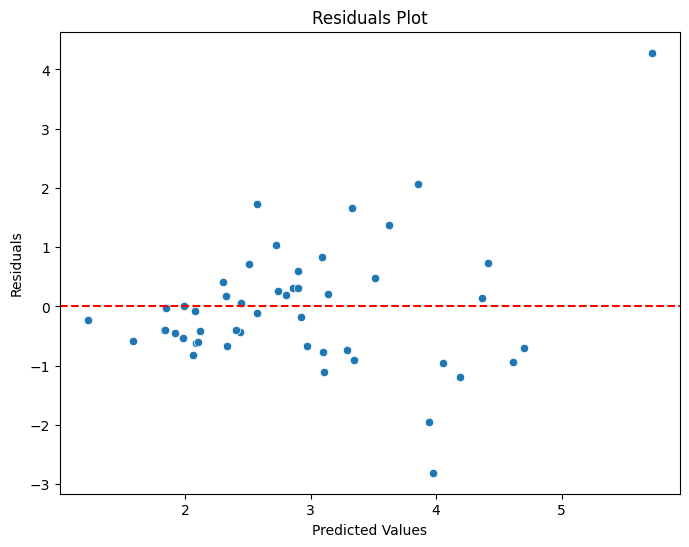

In [145]:
lasso_residuals = target_test - target_pred_lasso
plt.figure(figsize=(8, 6))
sns.scatterplot(x=target_pred_lasso, y=lasso_residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Residual for Decision tree

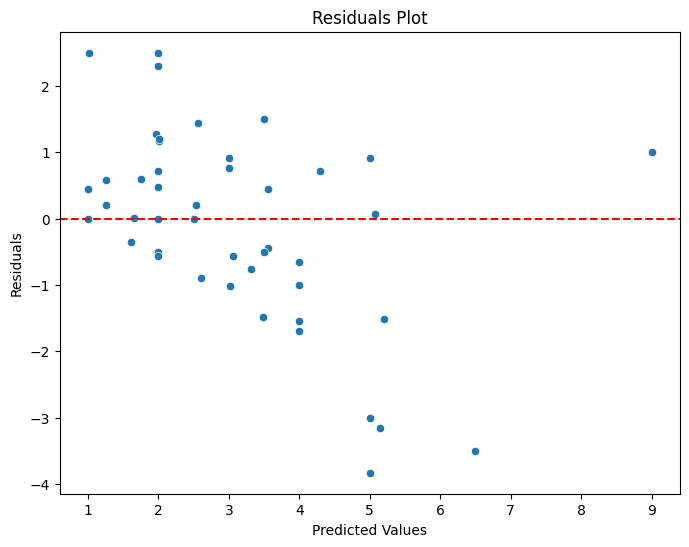

In [146]:
tree_residuals = target_test - target_pred_tree
plt.figure(figsize=(8, 6))
sns.scatterplot(x=target_pred_tree, y=tree_residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Residual for ensemble method

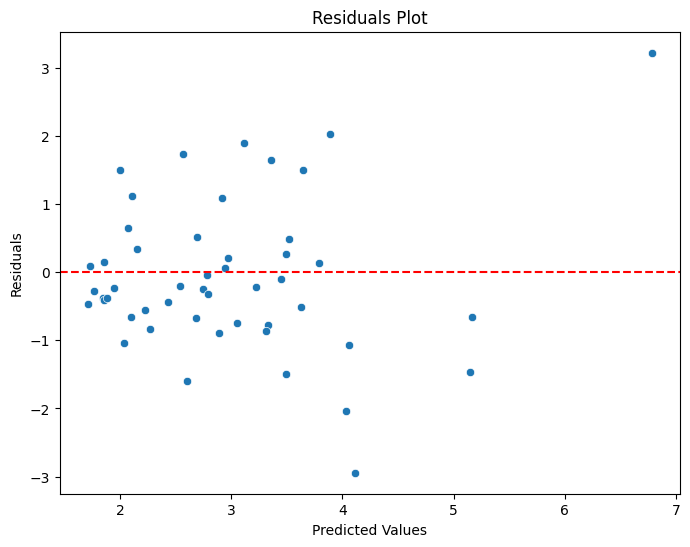

In [147]:
forest_residuals = target_test - target_pred_forest
plt.figure(figsize=(8, 6))
sns.scatterplot(x=target_pred_forest, y=forest_residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Residual method for KNN

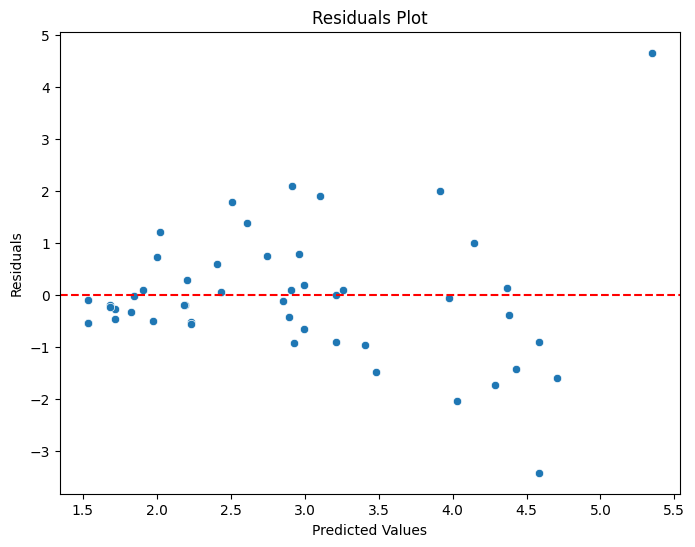

In [148]:
knn_residuals = target_test - target_pred_knn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=target_pred_knn, y=knn_residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Residual method for svr

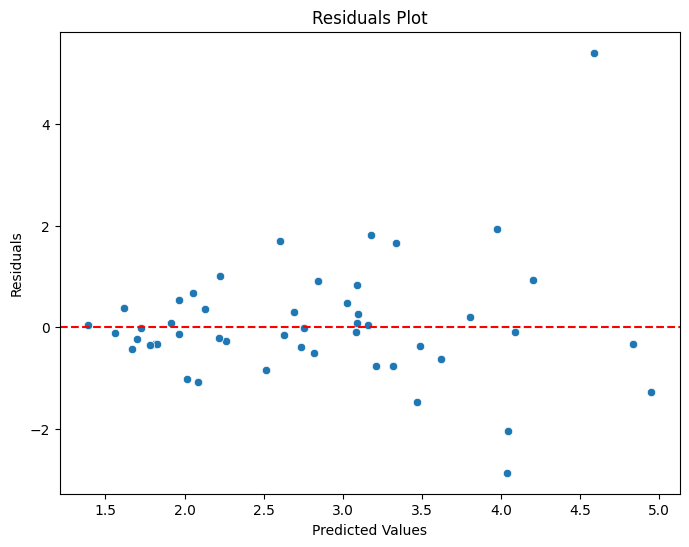

In [149]:
svr_residuals = target_test - target_pred_svr
plt.figure(figsize=(8, 6))
sns.scatterplot(x=target_pred_svr, y=svr_residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Box plot of day vs tip

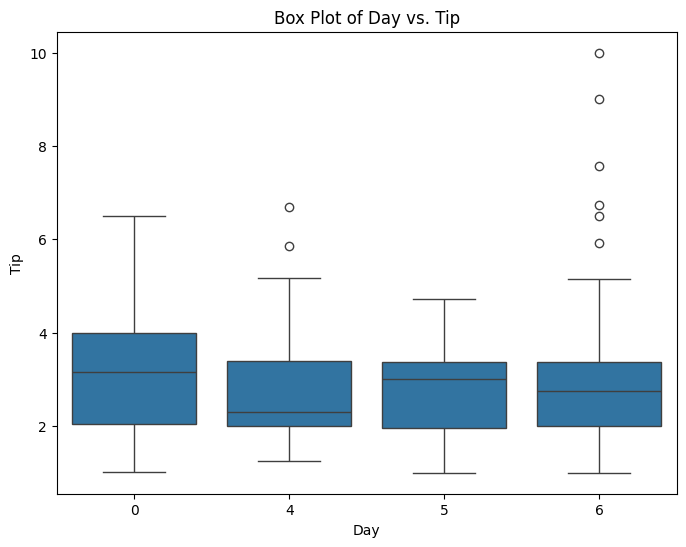

In [78]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='day', y='tip', data=df)
plt.title('Box Plot of Day vs. Tip')
plt.xlabel('Day')
plt.ylabel('Tip')
plt.show()

It can be seen that tips average of tips were high on week ends and fridays

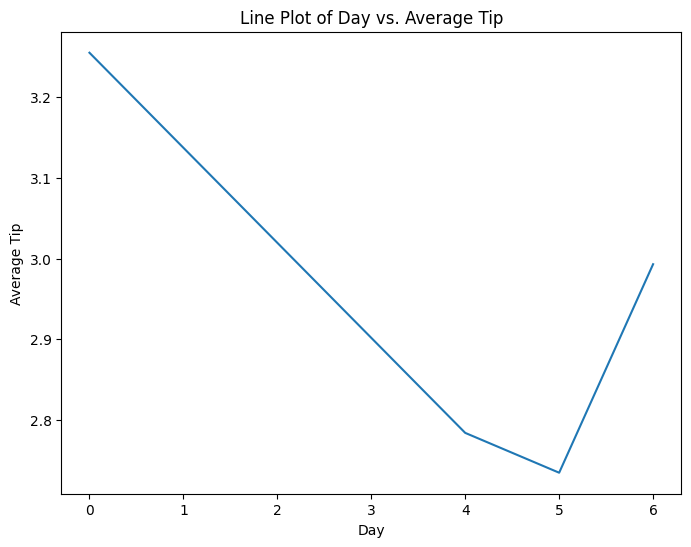

In [79]:
# 2. Line plot of day vs avg tip
avg_tip_by_day = df.groupby('day')['tip'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.lineplot(x='day', y='tip', data=avg_tip_by_day)
plt.title('Line Plot of Day vs. Average Tip')
plt.xlabel('Day')
plt.ylabel('Average Tip')
plt.show()


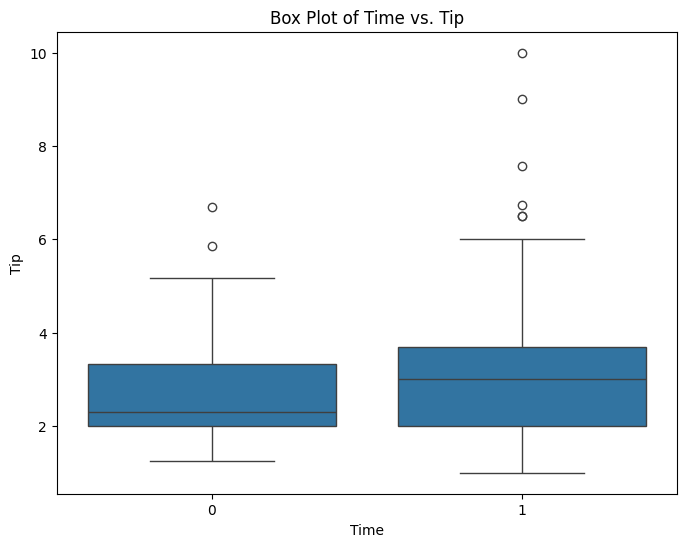

In [80]:
# 3. Box plot of time vs tip
plt.figure(figsize=(8, 6))
sns.boxplot(x='time', y='tip', data=df)
plt.title('Box Plot of Time vs. Tip')
plt.xlabel('Time')
plt.ylabel('Tip')
plt.show()


  Tips where high during the dinner

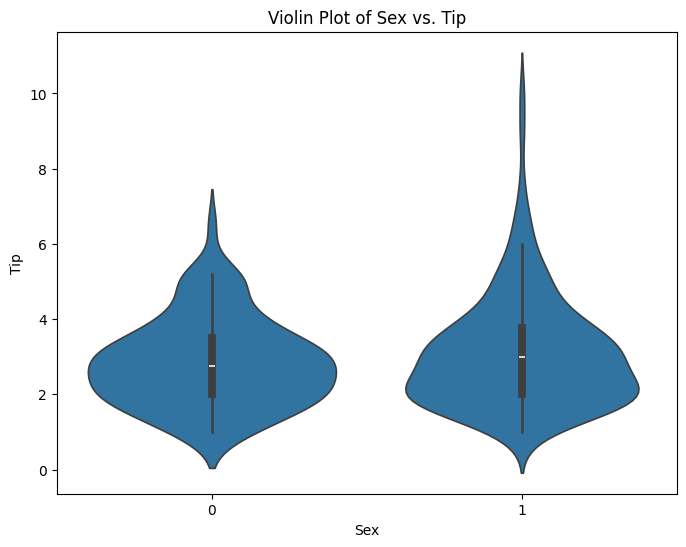

In [83]:
# 4. Violin plot of sex vs tip
plt.figure(figsize=(8, 6))
sns.violinplot(x='sex', y='tip', data=df)
plt.title('Violin Plot of Sex vs. Tip')
plt.xlabel('Sex')
plt.ylabel('Tip')
plt.show()


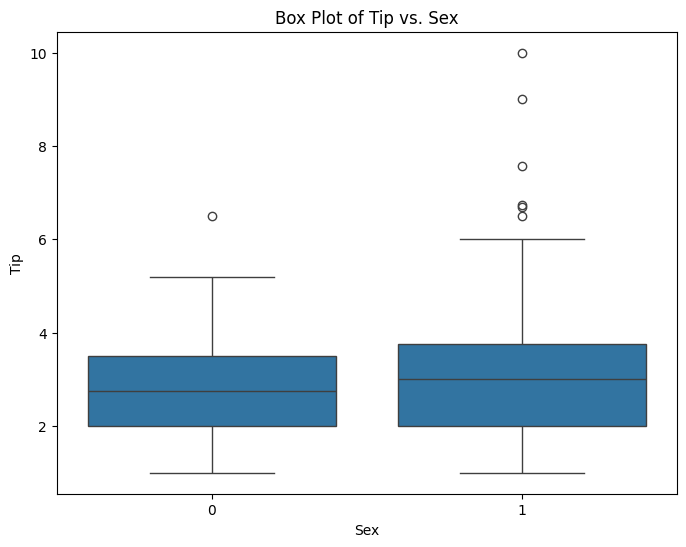

In [85]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='tip', data=df)
plt.title('Box Plot of Tip vs. Sex')
plt.xlabel('Sex')
plt.ylabel('Tip')
plt.show()

It can seen there is just minimal difference by which males have tpped more

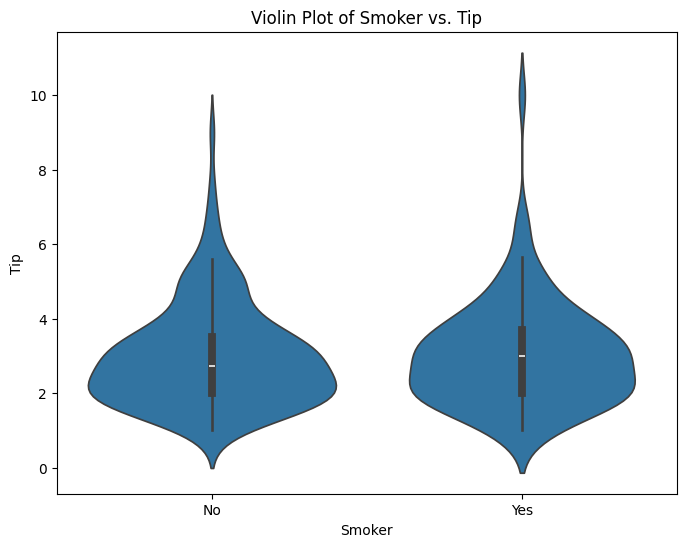

In [84]:
# 5. Violin plot of smoker vs tip
plt.figure(figsize=(8, 6))
sns.violinplot(x='smoker', y='tip', data=df)
plt.title('Violin Plot of Smoker vs. Tip')
plt.xlabel('Smoker')
plt.ylabel('Tip')
plt.show()

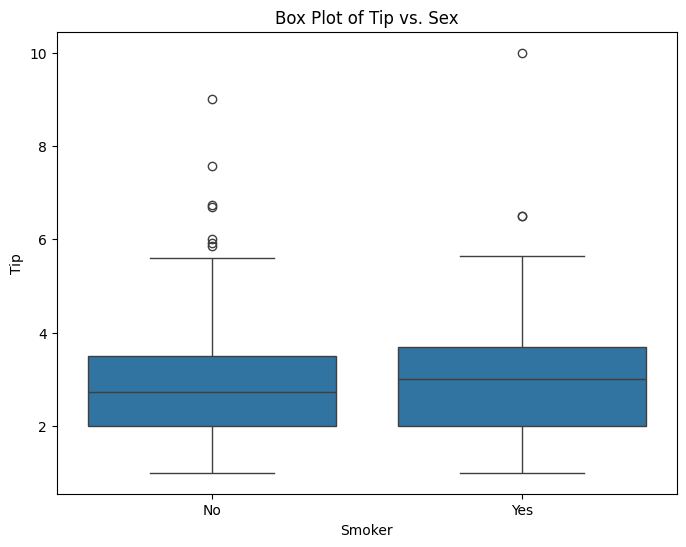

In [87]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='tip', data=df)
plt.title('Box Plot of Tip vs. Sex')
plt.xlabel('Smoker')
plt.ylabel('Tip')
plt.show()

Smokers have tipped more compared to non smokers

As we were able to see that there must be linear relation as p value is more than 0.05 so lets evaluate the best alpha for lasso and ridge model

Hyper tuning for ridge and lasso

In [93]:
# Define the range of alpha values to test
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [94]:
# For Ridge Regression:
ridge_grid = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_squared_error', cv=5)
# For Lasso Regression:
lasso_grid = GridSearchCV(Lasso(), param_grid, scoring='neg_mean_squared_error', cv=5)

In [96]:
# Fit the models to the training data
ridge_grid.fit(features_train, target_train)
lasso_grid.fit(features_train, target_train)
# Get the best alpha value for Ridge
best_alpha_ridge = ridge_grid.best_params_['alpha']

# Get the best alpha value for Lasso
best_alpha_lasso = lasso_grid.best_params_['alpha']

print("Best alpha for Ridge:", best_alpha_ridge)
print("Best alpha for Lasso:", best_alpha_lasso)

Best alpha for Ridge: 100
Best alpha for Lasso: 0.1


In [97]:
# Create and train Ridge model with the best alpha
best_ridge_model = Ridge(alpha=best_alpha_ridge)
best_ridge_model.fit(features_train, target_train)
target_pred_best_ridge = best_ridge_model.predict(features_test)

# Create and train Lasso model with the best alpha
best_lasso_model = Lasso(alpha=best_alpha_lasso)
best_lasso_model.fit(features_train, target_train)
target_pred_best_lasso = best_lasso_model.predict(features_test)


# Evaluate the models using R-squared and MSE
ridge_r2 = r2_score(target_test, target_pred_best_ridge)
ridge_mse = mean_squared_error(target_test, target_pred_best_ridge)
lasso_r2 = r2_score(target_test, target_pred_best_lasso)
lasso_mse = mean_squared_error(target_test, target_pred_best_lasso)


print("Ridge Regression with best alpha:")
print("R-squared:", ridge_r2)
print("MSE:", ridge_mse)

print("\nLasso Regression with best alpha:")
print("R-squared:", lasso_r2)
print("MSE:", lasso_mse)

Ridge Regression with best alpha:
R-squared: 0.5285720351785266
MSE: 1.1486224751317131

Lasso Regression with best alpha:
R-squared: 0.5274243648495187
MSE: 1.151418745256332


It is seen that though by a minimal amount but acurracy got increased

Hyper parameter tuning

In [103]:
# Decision Tree
tree_params = {'max_depth': [3, 5, 7, 9], 'min_samples_split': [2, 5, 10]}

# Random Forest
forest_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}

# SVR
svr_params = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10]}

# KNN
knn_params = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

In [114]:
# Decision Tree
tree_grid = GridSearchCV(DecisionTreeRegressor(random_state=0), tree_params, cv=5, scoring='r2')
tree_grid.fit(features_train, target_train)



GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [115]:
# Random Forest
forest_grid = GridSearchCV(RandomForestRegressor(random_state=0), forest_params, cv=5, scoring='r2')
forest_grid.fit(features_train, target_train)



GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [None, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [116]:


# SVR
svr_grid = GridSearchCV(SVR(), svr_params, cv=5, scoring='r2')
svr_grid.fit(features_train_scaled, target_train_scaled) # Remember to use scaled data for SVR



GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='r2')

In [117]:

# KNN
knn_grid = GridSearchCV(KNeighborsRegressor(), knn_params, cv=5, scoring='r2')
knn_grid.fit(features_train, target_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [119]:

print("Decision Tree - Best Params:", tree_grid.best_params_, "Best R2:", tree_grid.best_score_)
print("Random Forest - Best Params:", forest_grid.best_params_, "Best R2:", forest_grid.best_score_)
print("SVR - Best Params:", svr_grid.best_params_, "Best R2:", svr_grid.best_score_)
print("KNN - Best Params:", knn_grid.best_params_, "Best R2:", knn_grid.best_score_)

Decision Tree - Best Params: {'max_depth': 3, 'min_samples_split': 2} Best R2: 0.12926286891705618
Random Forest - Best Params: {'max_depth': 5, 'n_estimators': 50} Best R2: 0.18271660062936984
SVR - Best Params: {'C': 0.1, 'kernel': 'linear'} Best R2: 0.33198803268538635
KNN - Best Params: {'n_neighbors': 9, 'weights': 'uniform'} Best R2: 0.3167382331241728


Looking at these the best model with the given parameters and taking into considerations only linear model are to be taken as p value is grater than 0.05 is ridge regression.

Feature coefficients in Ridge regression to get idea about the most dependancy.

In [129]:
ridge_coefficients = best_ridge_model.coef_  # Assuming 'best_ridge' is your trained Ridge model

# Print the coefficients:
feature_names = df.drop(columns=['tip', 'smoker']).columns  # Get feature names

print("Ridge Regression Coefficients:")
for i, coef in enumerate(ridge_coefficients):
    print(f"{feature_names[i]}: {coef}")

Ridge Regression Coefficients:
total_bill: 0.09098055871666022
sex: 0.005047919438936469
day: -0.017202862568608736
time: -0.012862387244845315
size: 0.11627231709056524


Here it can be seen that total bill,size and sex hold relevance in the evaluation of tips. But the negative coefficients of day and time here do not imply a negative coorelation but a hint that these can be neglected as they are categorical variables and there analysis with tips would be better with graphs or other models. So now they can neglected and further detailed hypertuning can lead to more better result

**Final Conclusions**


1.   People in large groups tend to tip more.
2.Males tip a little bit more than the men.
3.Tips are more on friday and weekends
4.Tips are more during dinner
5.Smoker tips more than non smokers so some facility for smoking can also incorporated which might provide convinience to the non smokers and attract smokers in general.

So Combining all these one can suggest that the hotel should consider giving some sort of incentives to people coming in large groups during dinner on friday and weekends


